In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as sm
import pandas as pd
plt.rcParams["figure.dpi"] = 150

# Population

Population in this context refers to all the data it is possible to have that bears on a quantitative question. **We almost never have full population data in real problems**. We'll examine a data set related to anime media, treating this data set **as if it were the population**. 

In [2]:
anime = pd.read_csv("anime.csv")
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24012 entries, 0 to 24011
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           24012 non-null  int64  
 1   title                        24012 non-null  object 
 2   media_type                   24012 non-null  object 
 3   scoring                      14153 non-null  float64
 4   num_scoring_users            24012 non-null  int64  
 5   status                       24012 non-null  object 
 6   num_episodes                 24012 non-null  int64  
 7   start_date                   21160 non-null  object 
 8   end_date                     19719 non-null  object 
 9   source                       20238 non-null  object 
 10  num_list_users               24012 non-null  int64  
 11  popularity                   20538 non-null  float64
 12  num_favorites                24012 non-null  int64  
 13  rank            

In [3]:
anime.head()

,id,title,media_type,scoring,num_scoring_users,status,num_episodes,start_date,end_date,source,...,studios,synopsis,nsfw,created_at,updated_at,main_picture_medium,main_picture_large,alternative_titles_en,alternative_titles_ja,alternative_titles_synonyms
0,5114,Fullmetal Alchemist: Brotherhood,tv,9.14,1846307,finished_airing,64,2009-04-05 00:00:00,2010-07-04 00:00:00,manga,...,['Bones'],After a horrific alchemy experiment goes wrong...,white,2008-08-21 03:35:22,2022-04-18 05:06:13,https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,['Hagane no Renkinjutsushi: Fullmetal Alchemis...
1,11061,Hunter x Hunter (2011),tv,9.05,1488156,finished_airing,148,2011-10-02 00:00:00,2014-09-24 00:00:00,manga,...,"['Madhouse', 'Studio Live']",Hunters devote themselves to accomplishing haz...,white,2011-07-27 08:41:39,2022-04-18 05:11:21,https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,['HxH (2011)']
2,9253,Steins;Gate,tv,9.08,1240087,finished_airing,24,2011-04-06 00:00:00,2011-09-14 00:00:00,visual_novel,...,['White Fox'],Eccentric scientist Rintarou Okabe has a never...,white,2010-07-26 09:23:40,2022-05-01 21:24:42,https://api-cdn.myanimelist.net/images/anime/5...,https://api-cdn.myanimelist.net/images/anime/5...,Steins;Gate,STEINS;GATE,[]
3,21,One Piece,tv,8.65,1076776,currently_airing,0,1999-10-20 00:00:00,NaN,manga,...,['Toei Animation'],"Gol D. Roger was known as the ""Pirate King,"" t...",white,2005-11-11 01:20:50,2022-04-18 05:12:08,https://api-cdn.myanimelist.net/images/anime/6...,https://api-cdn.myanimelist.net/images/anime/6...,One Piece,ONE PIECE,['OP']
4,1535,Death Note,tv,8.62,2426765,finished_airing,37,2006-10-04 00:00:00,2007-06-27 00:00:00,manga,...,['Madhouse'],"Brutal murders, petty thefts, and senseless vi...",white,2006-10-04 03:39:19,2022-04-18 04:59:29,https://api-cdn.myanimelist.net/images/anime/9...,https://api-cdn.myanimelist.net/images/anime/9...,Death Note,デスノート,['DN']


Our first problem related to TV and movie anime. 

> Does the mean `scoring` of these two groups of entries differ significantly? 

Let's see a notched boxplot of the distribution. Note here that the notch shows a reasonable range (95% confidence interval) for the median.

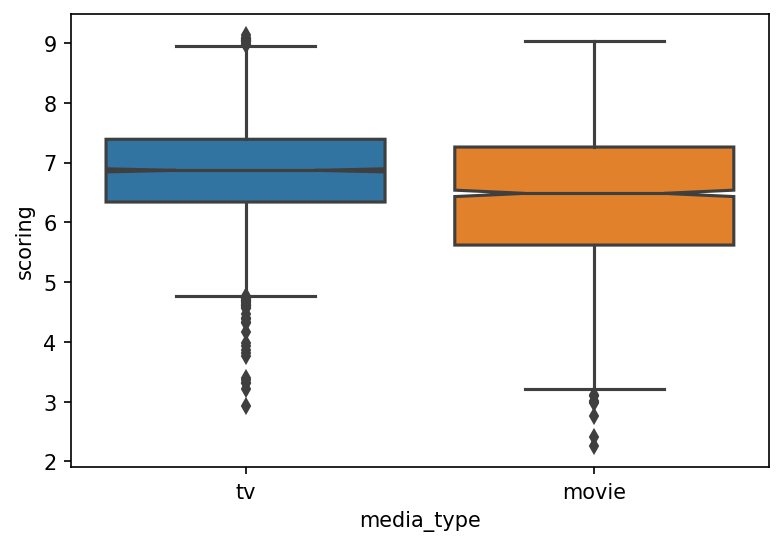

In [4]:
anime_tv_movie = anime.loc[anime.media_type.isin(["tv", "movie"]), :].dropna(subset=["scoring"])
ax = sns.boxplot(x="media_type", y="scoring", data=anime_tv_movie, notch=True)

Let's see the number of entries in each group

In [5]:
counts = anime_tv_movie.media_type.value_counts()
counts

tv       4175
movie    2282
Name: media_type, dtype: int64

and histograms of both distributions 

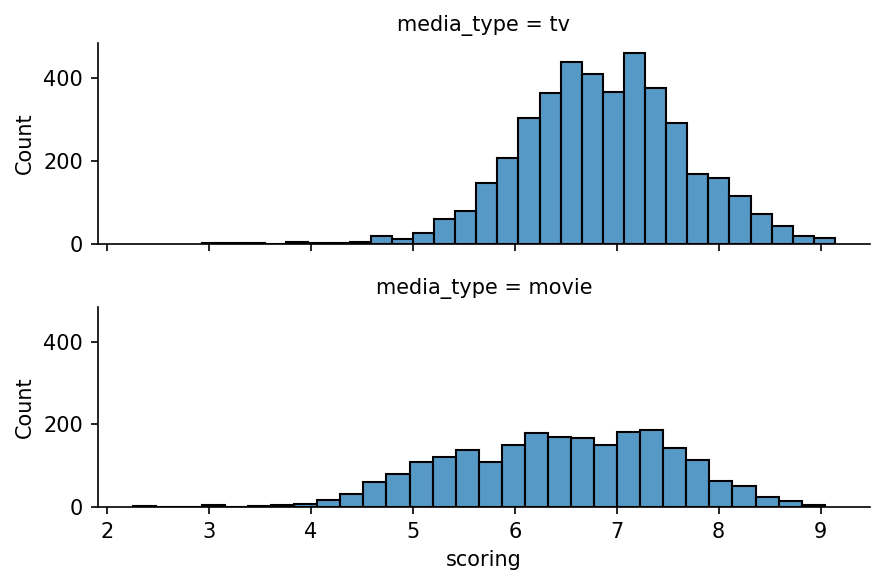

In [28]:
g = sns.FacetGrid(anime_tv_movie, row="media_type", height=2, aspect=3)
g.map(sns.histplot, "scoring", bins=30);

Note that neither distribution looks particularly normal, though they do seem unimodal.

OK, let's calculate the **population parameter**. Again, generally speaking, in real applications, we don't have access to population parameters, because we don't have access to complete populations. Inferential statistics boils down to an attempt to infer population parameters from a more limited set of data known as a **sample**

* Population $\rightarrow$ population parameter(s) (what we would like to know).
* Sample $\rightarrow$ infer sample statistic(s) (approximations for a population parameter given the limited data of the sample). 

Samples are often randomly gathered, and a huge number of samples of a given size are possible from a given population. So the question arises (and this is the fundamental question in statistics)

> 'How different might the sample statistic have been if a different sample were drawn? What is a reasonable range of sample statistics?' We call this the **sampling distribution** of a statistic.

![](img/many_samples.png)

In [8]:
tv_movie_diff_mean_scoring = np.mean(anime_tv_movie.loc[anime_tv_movie.media_type == "tv", "scoring"]) \
    - np.mean(anime_tv_movie.loc[anime_tv_movie.media_type == "movie", "scoring"])
tv_movie_diff_mean_scoring

0.4327295029572653

Finally, let's have a look at a measure of variation / spread in `scoring` for the two groups. Standard deviation is useful here, as it's in the same units as the original data.

In [11]:
tv_movie_stdevs = anime_tv_movie \
    .groupby("media_type") \
    .scoring \
    .std()
tv_movie_stdevs

media_type
movie    1.063675
tv       0.795099
Name: scoring, dtype: float64

# Sampling distribution

## Samples of size 200 from each group

Let's try to answer the question above sticking to the fiction that we have access to a complete population. We'll draw lots of random samples of a given size (200 animes each from `tv` and `movie`) and calculate our statistic of interest 

$\textrm{diff means} = \overline{\textrm{scoring}}_\textrm{tv} - \overline{\textrm{scoring}}_\textrm{movie}$

for each sample, storing it as we go. Note that a **single sample** here consists of 200 `tv` entries **and** 200 `movie` entries.

The final collection is the **sampling distribution** for the statistic of interest (in this case, the diff in means)

In [12]:
def create_diff_means_sampling_dist(population, score_column, group_column, group_labels, group_sizes, num_resamples):
    # filter populations down to relevant groups first
    first_population_group = population.loc[
        population[group_column] == group_labels[0], score_column
    ]
    second_population_group = population.loc[
        population[group_column] == group_labels[1], score_column
    ]
    
    # precompute label string
    samples_sizes_string = f"({group_sizes[0]},{group_sizes[1]})"

    sampling_dist = []
    for i in range(num_resamples):
        first_group_sample = first_population_group.sample(group_sizes[0], replace=False)
        second_group_sample = second_population_group.sample(group_sizes[1], replace=False)
        
        first_group_sample_mean = first_group_sample.mean()
        second_group_sample_mean = second_group_sample.mean()
        
        this_diff = first_group_sample_mean - second_group_sample_mean
        
        sampling_dist.append([i + 1, samples_sizes_string, \
            first_group_sample_mean, second_group_sample_mean, this_diff])
    
    return pd.DataFrame(
        data=sampling_dist, 
        columns=["resample", "sample_sizes", f"{group_labels[0]}_mean_{score_column}", \
            f"{group_labels[1]}_mean_{score_column}", "diff_means"]
    )

In [13]:
sampling_dist_diffs_200 = create_diff_means_sampling_dist(
    population=anime_tv_movie, 
    score_column="scoring", 
    group_column="media_type", 
    group_labels=["tv", "movie"], 
    group_sizes=[200, 200], 
    num_resamples=50000
)

In [14]:
sampling_dist_diffs_200

,resample,sample_sizes,tv_mean_scoring,movie_mean_scoring,diff_means
0,1,"(200,200)",6.93535,6.51330,0.42205
1,2,"(200,200)",6.78250,6.48145,0.30105
2,3,"(200,200)",6.87850,6.43725,0.44125
3,4,"(200,200)",6.87585,6.46235,0.41350
4,5,"(200,200)",6.74140,6.32920,0.41220
...,...,...,...,...,...
49995,49996,"(200,200)",6.92380,6.39435,0.52945
49996,49997,"(200,200)",6.92935,6.39815,0.53120
49997,49998,"(200,200)",6.89400,6.27770,0.61630
49998,49999,"(200,200)",6.87320,6.31170,0.56150


Note that the number of resamples is a setting we should worry about in a more realistic process. In general, we'd want to increase the number of resamples until some measure of the sampling distribution we're interested in converges. We'll see one of those measures below. For now let's have a look at the distribution.

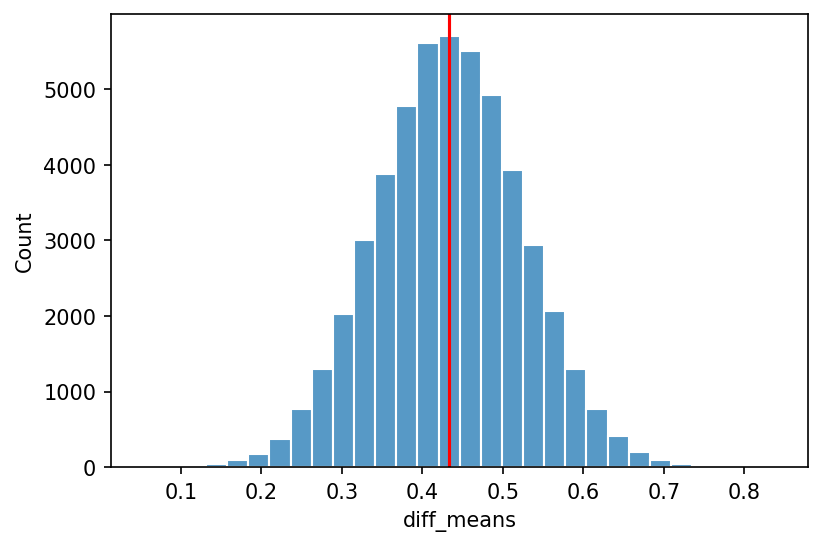

In [15]:
ax = sns.histplot(sampling_dist_diffs_200.diff_means, bins=30, edgecolor="white");
plt.axvline(tv_movie_diff_mean_scoring, 0, 1, color="red");

Note how normal this looks, even though the `scoring` distributions for `tv` and `movie` from each which statistic was calculated didn't look particularly normal. This result is called the **central limit theorem** and has been central to inferential statistics from its earliest days.

We can see a more compelling proof of the normality of the sampling distribution via a **quantile-quantile plot** - plot the quantiles of our distribution against the quantiles of the normal distribution. If the results fall on a line, the original distribution is normal.

/home/del/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


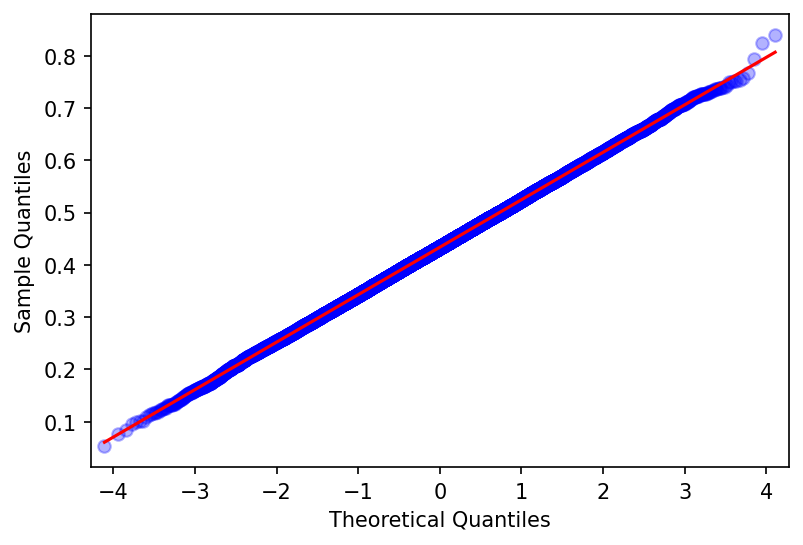

In [35]:
sm.qqplot(sampling_dist_diffs_200.diff_means, dist=norm, line="s", alpha=0.3);

Finally, here's a useful and important measure of the sampling distribution. Given we've taken lots of random samples of size 200 in each group from our population, what's a reasonable range across all samples of our statistic 

$\textrm{diff means} = \overline{\textrm{scoring}}_\textrm{tv} - \overline{\textrm{scoring}}_\textrm{movie}$?

Let's look at the central 95% of the distribution. What we're saying with this distribution is that we expect 95% of our random samples to generate a sample statistic within this range.

In [36]:
np.quantile(sampling_dist_diffs_200.diff_means, [0.025, 0.975]) 

array([0.2562 , 0.61185])

## Samples of size 1000

In [ ]:
sampling_dist_diffs_1000 = create_diff_means_sampling_dist(
    population=anime_tv_movie, 
    score_column="scoring", 
    group_column="media_type", 
    group_labels=["tv", "movie"], 
    group_sizes=[1000, 1000], 
    num_resamples=50000
)

In [ ]:
sampling_dist_diffs = pd.concat([sampling_dist_diffs_200, sampling_dist_diffs_1000], axis=0, ignore_index=True)

In [ ]:
sampling_dist_diffs

In [ ]:
g = sns.FacetGrid(sampling_dist_diffs, row="sample_sizes", height=2, aspect=3)
g.map(sns.histplot, "diff_means", bins=30);
g.map(plt.axvline, x=tv_movie_diff_mean_scoring, ymin=0, ymax=1, color="red");

In [ ]:
sampling_dist_diffs \
    .groupby("sample_sizes") \
    .diff_means \
    .agg(
        count=np.size,
        lower_interval=lambda x: np.quantile(x, 0.025),
        upper_interval=lambda x: np.quantile(x, 0.975),
        standard_error=np.std
    )

# Central limit theorem

What we've done above is a thought exercise only. In **inferential statistics** we typically:

* don't have access to the whole population. If we did, we calculate the property of interest once, and that's the end of the story (and this would fall in the remit of **descriptive statistics**)
* don't repeatedly sample from the population. Typically, we take one sample, and we make it as large as cost/practicality allow, or as we've determined will provide the *statistical power* necessary to reliably detect the effect we're interested in

$\sigma_{\overline{\textrm{A}}-\overline{\textrm{B}}} = \sqrt{\frac{\sigma_\textrm{A}^2}{n_\textrm{A}} + \frac{\sigma_\textrm{B}^2}{n_\textrm{B}}}$

In [ ]:
std_err_200 = np.sqrt(tv_movie_stdevs["tv"]**2/200 + tv_movie_stdevs["movie"]**2/200)
std_err_200

In [ ]:
std_err_1000 = np.sqrt(tv_movie_stdevs["tv"]**2/1000 + tv_movie_stdevs["movie"]**2/1000)
std_err_1000

# Reality: a single sample...

Let's have a look at a single sample

In [ ]:
def create_single_sample(population, score_column, group_column, group_labels, group_sizes):
    first_population_group = population.loc[
        population[group_column] == group_labels[0], [group_column, score_column]
    ]
    second_population_group = population.loc[
        population[group_column] == group_labels[1], [group_column, score_column]
    ]
    
    first_group_sample = first_population_group.sample(group_sizes[0], replace=False)
    second_group_sample = second_population_group.sample(group_sizes[1], replace=False)
    
    return pd.concat([first_group_sample, second_group_sample], axis=0, ignore_index=True)
    

In [ ]:
single_sample = create_single_sample(
    population=anime_tv_movie, 
    score_column="scoring", 
    group_column="media_type",
    group_labels=["tv", "movie"], 
    group_sizes=[1000, 1000]
)
ax = sns.boxplot(x="media_type", y="scoring", data=single_sample, notch=True)

In [ ]:
single_sample

In [ ]:
sample_statistic = np.mean(single_sample.loc[single_sample.media_type == "tv", "scoring"]) \
    - np.mean(single_sample.loc[single_sample.media_type == "movie", "scoring"])
sample_statistic

So what do we do if we only have this one sample. This is all the data it was practical to gather, and we want to use this to **infer** the 

## Bootstrapping

In [ ]:
def create_diff_means_bootstrap_dist(sample, score_column, group_column, group_labels, num_resamples):
    first_sample_group = sample.loc[
        sample[group_column] == group_labels[0], score_column
    ]
    first_sample_group_size = first_sample_group.shape[0]
    second_sample_group = sample.loc[
        sample[group_column] == group_labels[1], score_column
    ]
    second_sample_group_size = second_sample_group.shape[0]
    
    bootstrap_dist_diffs = []
    for i in range(num_resamples):
        first_group_sample = first_sample_group.sample(first_sample_group_size, replace=True)
        second_group_sample = second_sample_group.sample(second_sample_group_size, replace=False)
        
        first_group_sample_mean = first_group_sample.mean()
        second_group_sample_mean = second_group_sample.mean()
        
        this_diff = first_group_sample_mean - second_group_sample_mean
        
        bootstrap_dist_diffs.append([i + 1, \
            first_group_sample_mean, second_group_sample_mean, this_diff])
    
    return pd.DataFrame(
        data=bootstrap_dist_diffs, 
        columns=["resample", f"{group_labels[0]}_mean_{score_column}", \
            f"{group_labels[1]}_mean_{score_column}", "diff_means"]
    )

In [ ]:
bootstrap_dist = create_diff_means_bootstrap_dist(
    sample=single_sample,
    score_column="scoring",
    group_column="media_type",
    group_labels=["tv", "movie"],
    num_resamples=50000
)

In [ ]:
bootstrap_dist

In [ ]:
ax = sns.histplot(bootstrap_dist.diff_means, bins=30, edgecolor="white");
plt.axvline(sample_statistic, 0, 1, color="red");

In [ ]:
sm.qqplot(bootstrap_dist.diff_means, line="s");

### Percentile bootstrap

In [ ]:
def percentile_CI(bootstrap_dist, value_column, confidence_level):
    lower_prob = (1 - confidence_level)/2
    upper_prob = confidence_level + lower_prob
    return np.quantile(bootstrap_dist[value_column], [lower_prob, upper_prob])

In [ ]:
percentile_CI(bootstrap_dist, "diff_means", 0.95)

### Bias-corrected bootstrap

In [ ]:
def bias_corrected_CI(bootstrap_dist, sample_stat, value_column, confidence_level):
    '''
    Assumes that bootstrap sampling distribution is normal and should by symmetrically distributed around the 
    sample statistic. Any deviation from latter reflects effects of bias in bootstrap distribution. CI can be 
    corrected to symmetrise distribution around sample statistic. 
    '''
    lower_prob = (1 - confidence_level)/2
    upper_prob = confidence_level + lower_prob
    
    lower_z = norm.ppf(lower_prob)
    upper_z = norm.ppf(upper_prob)
    
    num_below_stat = np.sum(np.array([1 for value in bootstrap_dist[value_column] if value <= sample_stat]))
    frac_below_stat = num_below_stat / bootstrap_dist.shape[0]
    z0 = norm.ppf(frac_below_stat)
    
    corrected_lower_prob = norm.cdf(2 * z0 + lower_z)
    corrected_upper_prob = norm.cdf(2 * z0 + upper_z)
        
    return np.quantile(bootstrap_dist[value_column], [corrected_lower_prob, corrected_upper_prob])

In [ ]:
bias_corrected_CI(bootstrap_dist, sample_statistic, "diff_means", 0.95)

### Improving bootstrap accuracy

We don't really have time to get into them here, but more accurate bootstrap methods exist than the simple percentile and bias-corrected (BC) algorithms presented above. In particular, the double (or studentized) bootstrap offers significant improvements at the cost of increased computational complexity. 

In the latter method, we perform **nested bootstraps**: for each outer bootstrap resample we perform an inner bootstrap, typically with a much smaller number of replications of order 10s-100s. The aim of the inner bootstrap is to estimate the standard error for that particular resample. 

It's easy to appreciate that this inner loop greatly increases the computational burden, naively by a factor of the number of inner replicates, but algorithms based on early stopping rules exist that aim to curb the effort required (see Nankervis 2005 https://doi.org/10.1016/j.csda.2004.05.023).  

![Variation in coverage and CI width of different bootstrap methods with sample size](img/CI_coverage_width_methods.png)
**Fig. 1**: Variation in coverage and CI width of different bootstrap methods with sample size (Bittmann 2021)

**'Coverage'**: we aim to calculate CIs at a particular confidence level, but the effect of small sample sizes and/or skew and outliers can shift confidence away from the anticipated value. The actual value achieved is termed the 'coverage'. We can estimate coverage in the following way:

1. For a given population distribution, calculate the parameter of interest.
2. Pull a random sample from the population (without replacement) of the correct size $n$.
3. Given that sample, calculate a CI for your statistic at the desired confidence level, using your algorithm of choice, making sure the algorithm is converged wrt other variables we control (number of replicates being the main one).
4. Note whether the population parameter lies within the CI.
5. Go to 2 and repeat a decent number of times, e.g. a few thousand.
6. The proportion of calculated CIs containing the population parameter is the coverage achieved for that population distribution, at that sample size, for that bootstrap algorithm.

# Hypothesis testing

## Reminder 

Typically have two **mutually exclusive** (can't both be true simultaneously) and **exhaustive** (no other options) hypotheses we are trying to decide between based on available data. Acknowledging we have choice in how we set up our hypotheses, by convention: 

* We consider the **null** hypothesis $H_0$ to be true by default. This represents the 'conservative' position (business as usual, nothing interesting is happening). In a court case, this would be the 'not guilty' verdict.
* We place the burden of proof on the **alternative** hypothesis $H_a$, which represents the 'active' position (something interesting is happening, new finding, significant change from prior behaviour). In a court case, this would be the 'guilty' verdict, which has to be actively proven (as 'not guilty' is the default judgement).

**Example - Website A/B testing** 

For randomly sampled group of users B (perhaps stratified) show them button in proposed new position, while for remainder group A show them button in old position. Gather click-through rate for both groups. Try to aim for equal group sizes. 
* $H_0 = \textrm{click-through rate in group B is less than or equal to rate in group A}$ 
* $H_a = \textrm{click-through rate in group B is greater than rate in group A}$
* This is an example of a 'one-tailed' test: we are interested in deviations from the null in only one direction ('...greater than...')
* If we had more than two potential button positions we could use an ANOVA style approach where we split incoming users into more than two groups. Our first hypothesis test would be determine whether 'somewhere there exists a significant difference between click-through rates amidst all the groups'. We could then conduct post-hoc tests to determine where any significant differences arise.

The outcome of the test is typically determined by calculating a $p$-value ($p$ standing for probability). This is often misinterpreted: it is **not** the probability that  

# Regression

In [ ]:
anime_tv = anime.loc[anime.media_type == "tv", :].dropna(subset=["scoring", "average_episode_duration"])
anime_tv.average_episode_duration

In [ ]:
anime_tv.average_episode_duration = pd.to_timedelta(anime.average_episode_duration).apply(lambda x: x.total_seconds())
plot = sns.scatterplot(data=anime_tv, x="average_episode_duration", y="scoring", alpha=0.3);

In [ ]:
model = sm.OLS(endog=anime_tv.scoring, exog=sm.add_constant(anime_tv.average_episode_duration)).fit()

In [ ]:
model.params

In [ ]:
plot = sns.scatterplot(data=anime_tv, x="average_episode_duration", y="scoring", alpha=0.3);
plt.axline(xy1=(0, model.params['const']), slope=model.params['average_episode_duration'], color="red");

In [ ]:
model.conf_int(alpha=0.05)

In [ ]:
sm.qqplot(model.resid, line="s", alpha=0.3);

In [ ]:
def bootstrap_simple_linear_regression(sample, x_column, y_column, num_resamples):
    results = []
    for i in range(num_resamples):
        this_resample = sample.sample(sample.shape[0], replace=True)
        this_model = sm.OLS(endog=this_resample[y_column], exog=sm.add_constant(this_resample[x_column])).fit()
        results.append([i + 1, this_model.params["const"], this_model.params[x_column], this_model.rsquared])
    
    return pd.DataFrame(
        data=results, 
        columns=["resample", "const", x_column, "rsquared"]
    )

In [ ]:
bootstrap_regression = bootstrap_simple_linear_regression(anime_tv, "average_episode_duration", "scoring", 10000)

In [ ]:
percentile_CI(
    bootstrap_dist=bootstrap_regression,
    value_column="average_episode_duration",
    confidence_level=0.95,
)

In [ ]:
bias_corrected_CI(
    bootstrap_dist=bootstrap_regression,
    value_column="average_episode_duration",
    confidence_level=0.95,
    sample_stat=model.params["average_episode_duration"]
)

In [ ]:
percentile_CI